# Семинар 5: взрыв и затухание градиента

В этой тетрадке мы немного поэкспериментируем с затухающими и взрывающимися градиентами. Делать это будем на уже знакомом нам датасете fashoin MNIST. 

В этом разделе мы не будем пытаться подобрать более удачную архитектуру, нам интересно только посмотреть на особенности обучения глубоких сетей.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
tf.__version__ 

'2.8.0'

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

X_train.shape, X_test.shape

4431872/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (10000, 28, 28))

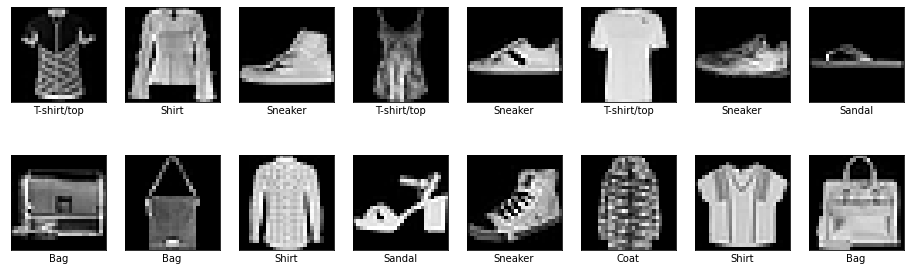

In [4]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols, 2.5 * rows))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_train))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(X_train[random_index, :], cmap = 'gray')
        ax.set_xlabel(class_names[y_train[random_index]])
plt.show()

In [5]:
X_train.max()/2

127.5

In [6]:
X_train = X_train/127.5 - 1
X_test = X_test/127.5 - 1

In [7]:
X_train.min(), X_train.max()

(-1.0, 1.0)

Для экспериментов нам понадобится реализовать сеть, в которой можно легко менять количество слоев. Также эта сеть должна сохранять градиенты на всех слоях, чтобы потом мы могли посмотреть на их величины.

**Задание 1:** допишите недостающую часть кода ниже.

In [ ]:
from tensorflow.keras import Model, layers, Sequential
import tensorflow.keras.optimizers as opt

class DeepDenseNet(Model):
    def __init__(self):
        super().__init__()
        self.activation = activation
        
        self.nn_grads = [ ]
        self.nn_layers = [ ]

        # <your code here>

        self.seq = Sequential(*self.nn_layers)
        
    def call(self, x):
        out = self.seq(x)
        return out

Напишите функции обучения так, чтобы они рисовали графики изменения градиентов и траектории обучения.

In [ ]:
# <your code here>

**Задание 2:**
* Обучите сети глубины 10 и больше с сигмоидой в качестве активации. Исследуйте, как глубина влияет на качество обучения и поведение градиентов на далеких от выхода слоях.
* Теперь замените активацию на ReLU и посмотрите, что получится.

In [ ]:
# ...

Теперь попробуем добавить в сеть skip-connections (по примеру ResNet) вместо замены сигмоиды на relu и посмотрим, что получится. Запихнуть все слои в nn.Sequential и просто их применить теперь не получится - вместо этого мы их применим вручную.

**Задание 3:** допишите недостающую часть кода ниже.

In [ ]:
class DeepDenseResNet(nn.Module):
    def __init__(self, n_layers, hidden_size, activation):
        super().__init__()
        self.activation = activation
        
        # <your code here>
        
    def call(self, x):
        
        # <your code here>
        
        return out

Убедимся, что такая сеть отлично учится даже на большом числе слоев.

In [ ]:
model = DeepDenseResNet(n_layers=20, hidden_size=10, activation=nn.Sigmoid)
# <your code here>